In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from numpy import arange
from pandas import read_csv
from pandas import set_option
from pandas.tools.plotting import scatter_matrix
import seaborn as sns
%matplotlib inline

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 8
sns.set_context("poster")
sns.set_style("whitegrid")

In [3]:
os.chdir('C:\Users\chads\Desktop')

In [4]:
# Import and preview newdf dataset
newdf = pd.read_csv("newdf.csv")
newdf.head()

,Unnamed: 0,position,height,weight,fortyyd,twentyss,threecone,vertical,broad,bench,picktotal
0,0,RB,69.0,205,4.60,3.95,6.79,42.5,130.0,24.0,54.0
1,1,WR,72.0,198,4.42,NaN,NaN,NaN,NaN,12.0,20.0
2,2,RB,72.0,221,4.57,4.10,7.10,39.0,121.0,19.0,149.0
3,3,OLB,73.0,227,4.55,4.20,7.14,36.0,121.0,24.0,124.0
4,4,WR,68.0,180,4.43,4.07,6.64,34.0,121.0,13.0,238.0


# Exploratory Data Analysis

###  Descriptive Statistics

In [5]:
newdf.describe()

,Unnamed: 0,height,weight,fortyyd,twentyss,threecone,vertical,broad,bench,picktotal
count,3133.000000,3133.000000,3133.000000,3021.000000,2357.000000,694.000000,2735.000000,2640.000000,2336.000000,3133.000000
mean,2371.137887,74.147662,246.581870,4.765846,4.362766,7.178674,33.358135,114.419318,21.767979,115.651771
std,1371.799180,2.616408,46.292597,0.309089,0.262574,0.394915,4.198680,9.341786,6.501070,70.758473
min,0.000000,65.000000,155.000000,4.240000,3.730000,6.300000,20.500000,74.000000,2.000000,1.000000
25%,1194.000000,73.000000,207.000000,4.520000,4.170000,6.890000,30.500000,108.000000,17.000000,55.000000
50%,2360.000000,74.000000,239.000000,4.680000,4.320000,7.090000,33.500000,115.500000,22.000000,110.000000
75%,3553.000000,76.000000,293.000000,4.980000,4.530000,7.390000,36.500000,121.000000,26.000000,173.000000
max,4821.000000,81.000000,386.000000,5.710000,5.260000,8.310000,46.000000,147.000000,49.000000,262.000000


In [6]:
# Count how many players in each position
newdf["position"].value_counts()

WR     414
CB     353
DE     293
OT     270
OLB    264
DT     258
S      254
RB     246
OG     198
TE     183
QB     171
ILB    143
C       86
Name: position, dtype: int64

In [7]:
# Count how many times the positions did every drill
count = newdf.groupby('position').count()
count

,Unnamed: 0,height,weight,fortyyd,twentyss,threecone,vertical,broad,bench,picktotal
position,,,,,,,,,,
C,86,86,86,77,72,11,73,72,76,86
CB,353,353,353,343,264,76,316,312,290,353
DE,293,293,293,283,220,72,253,252,238,293
DT,258,258,258,245,181,47,216,206,215,258
ILB,143,143,143,140,101,19,121,113,125,143
OG,198,198,198,190,154,42,161,155,172,198
OLB,264,264,264,250,205,45,228,229,228,264
OT,270,270,270,264,226,57,238,229,231,270
QB,171,171,171,164,138,36,143,140,5,171


# Data Visualization

In [8]:
attributes = (newdf.drop(['picktotal'],axis=1))

Checking attribute distribution. Forty yard dash, three cone, and twenty short shuttle appears skewed to the right. Broad jump slightly skewd to the left. Height and weight are bimodal, which makes sense, since there are a lot of really big guys and a lot of average sized guys. Vertical jump and bench press appear to be close to having a normal distribution.

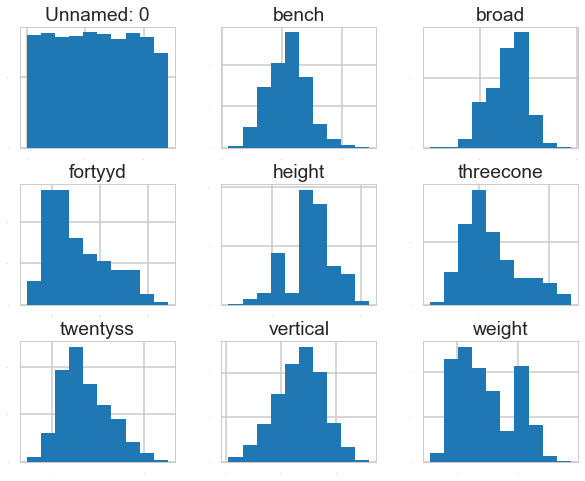

In [9]:
# Looking at distributions for the player attributes. Looking for skewed data and may have to transform later.
_=attributes.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, layout=(3,3))

Will now use a density plot on the attributes, since this is what our eyes are trying to do when looking at a histogram.

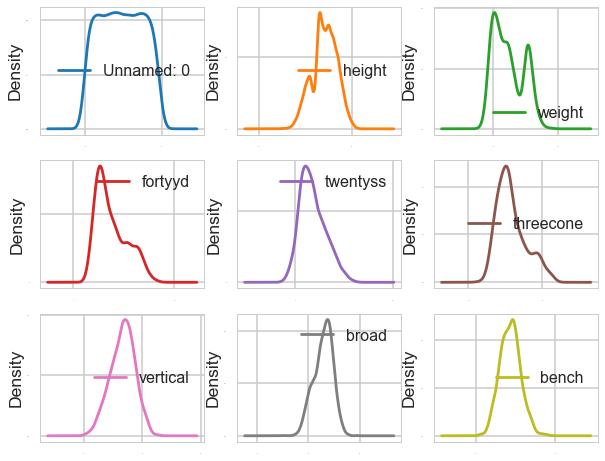

In [10]:
# Will look at density plots, since this is more natural for our eyes.
_=attributes.plot(kind='density', subplots=True, layout=(3,3), sharex=False, fontsize=1)

Box and whisker plot of the attributes. Looking at spread of each attribute. Will probably have to rescale the attributes later.

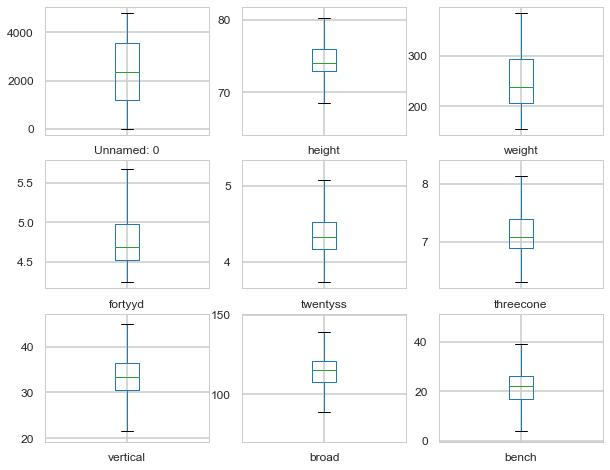

In [11]:
# Box and whisker of attributes
_=attributes.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, fontsize=12)

C:\Users\chads\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


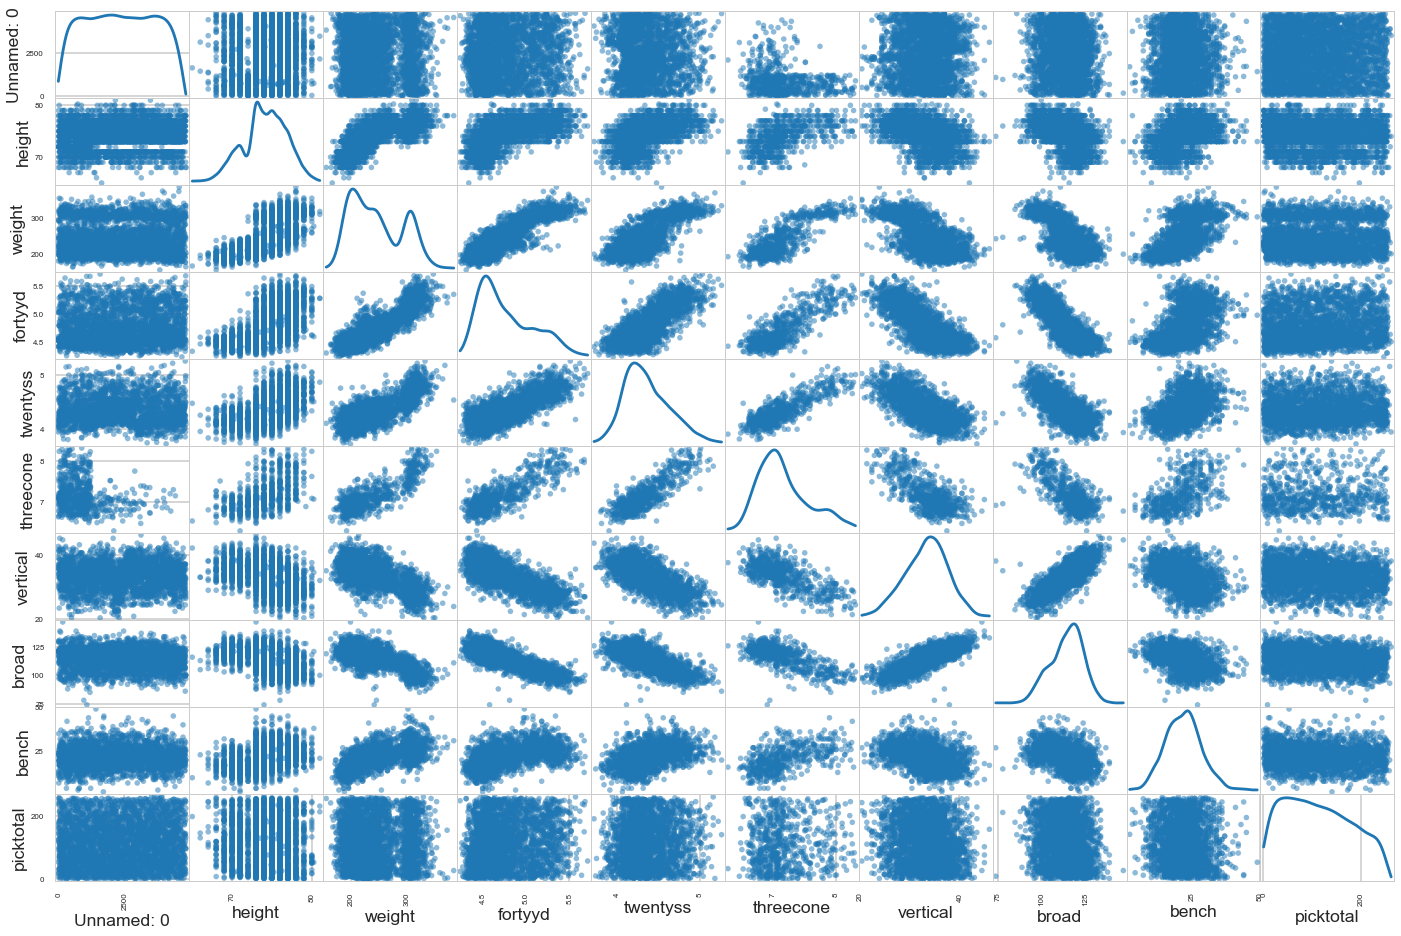

In [12]:
_=scatter_matrix(newdf, alpha=0.5, figsize=(24, 16), diagonal='kde')

Looking to see if player attributes are correlated and getting a peak to see if any attributes are correlated with picktotal. Used Spearman correlation, since we want to rank the players and that's pretty much what happens during the draft, with coaches and general managers ranking players.

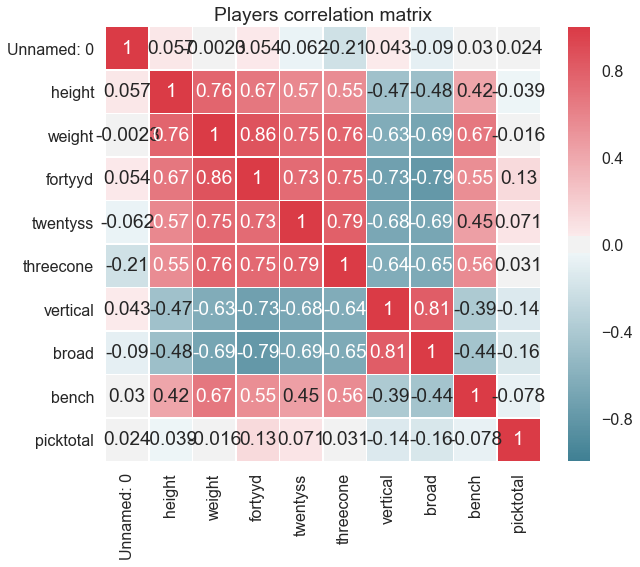

In [13]:
# Correlation matrix of attributes and picktotal
f, ax = plt.subplots()
corr = newdf.corr(method='spearman')
sns.heatmap(corr, linewidths=0.5, annot=True, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax, vmin=-1, vmax=1)
_=plt.title('Players correlation matrix')

After viewing the poor correlation results between the attribues and picktotal, it made me believe that we are comparing apples to oranges. Players that play positions are very different. The following is the mean and standard deviation of the players height, weight and drills per position

In [14]:
# Mean and standard deviation of every drill and picktotal for each position
newdfa = newdf[['position', 'height', 'weight', 'fortyyd', 'twentyss', 'threecone', 'vertical', 'broad', 'bench', 'picktotal']]
grouped = newdfa.groupby('position')
groupedagg = grouped.agg([np.mean, np.std])
groupedagg

height                weight              fortyyd            \
               mean       std        mean        std      mean       std   
position                                                                   
C         75.430233  1.068707  304.337209   7.725604  5.214545  0.146229   
CB        71.260977  1.557581  193.099150   8.654927  4.475277  0.085593   
DE        75.886519  1.394716  269.204778  13.729245  4.810318  0.135501   
DT        75.143411  1.462493  307.468992  14.421969  5.087592  0.157114   
ILB       73.664336  1.227296  242.097902   7.503346  4.720500  0.119087   
OG        76.090909  1.226533  314.656566  13.174473  5.272316  0.154943   
OLB       74.060606  1.388478  241.284091  10.229625  4.676680  0.119412   
OT        77.748148  1.211583  316.662963  14.412707  5.238258  0.176482   
QB        75.216374  1.646733  224.239766  11.282253  4.813841  0.187232   
RB        70.870427  1.930301  214.556911  14.039696  4.534191  0.112351   
S         72.748031  1.460784  208.358268   9.482749  4.546379  0.086841   
TE        76.448087  1.349108  254.704918   9.020144  4.749302  0.134066   
WR        72.784118  2.272771  201.014493  15.675887  4.485966  0.097519   

          twentyss           threecone             vertical            \
              mean       std      mean       std       mean       std   
position                                                                
C         4.599722  0.160211  7.740909  0.283741  28.760274  2.992014   
CB        4.136136  0.148414  6.898026  0.189399  36.416139  2.740946   
DE        4.405773  0.179117  7.233472  0.202423  33.478261  3.015588   
DT        4.605193  0.187384  7.642979  0.286098  29.476852  2.895373   
ILB       4.283960  0.142591  7.112632  0.180119  33.595041  2.839685   
OG        4.726039  0.199334  7.849048  0.247217  27.990683  2.996598   
OLB       4.265659  0.148516  7.130444  0.264601  34.927632  3.200052   
OT        4.723717  0.179167  7.762982  0.278715  28.592437  2.981282   
QB        4.301014  0.169147  7.115833  0.205626  31.769231  3.558252   
RB        4.229527  0.157770  7.005102  0.188482  35.037946  3.067205   
S         4.176743  0.138449  6.992424  0.237092  36.207763  2.799735   
TE        4.341942  0.162529  7.174286  0.188137  33.550633  3.098793   
WR        4.191086  0.146686  6.900968  0.183863  35.918182  3.008743   

               broad                bench             picktotal             
                mean       std       mean       std        mean        std  
position                                                                    
C         102.236111  5.524575  26.986842  5.679186  120.139535  65.483211  
CB        122.221154  5.509343  15.117241  4.169428  103.665722  64.999007  
DE        114.916667  6.249542  24.285714  4.938684  112.778157  74.694734  
DT        105.097087  5.551558  28.200000  5.884559  108.453488  70.745336  
ILB       113.725664  7.787636  23.056000  3.992541  118.916084  67.132882  
OG        101.374194  6.248271  26.250000  5.360812  128.449495  66.755976  
OLB       117.820961  6.245581  23.087719  4.872943  114.928030  68.087051  
OT        102.755459  5.837081  25.367965  4.857859  109.896296  75.413534  
QB        110.871429  6.879061  22.000000  2.549510  105.163743  79.374741  
RB        118.678049  5.653713  20.343434  4.607788  120.105691  70.337880  
S         120.809302  5.736089  17.189189  4.430486  123.917323  68.434189  
TE        115.302632  5.242515  21.543750  4.433785  130.234973  69.294835  
WR        120.936111  5.603802  15.056818  4.359182  118.594203  71.483617

The mean picktotal and innerquartiles very different for the positions.
Check out next section hypothesis tests..